In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import prepare

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-dark-palette')
plt.rc('font', size=14)

In [75]:
# use a function to pull in data
df = prepare.prepare_store_data()
df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,January,Tuesday,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,January,Tuesday,294.00


In [76]:
# resample to get daily total sales
df = pd.DataFrame(df.resample('D').sales_total.sum())
df.head()

,sales_total
sale_date,
2013-01-01 00:00:00+00:00,73844.01
2013-01-02 00:00:00+00:00,73570.58
2013-01-03 00:00:00+00:00,78169.48
2013-01-04 00:00:00+00:00,84467.73
2013-01-05 00:00:00+00:00,87621.85


In [77]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Freq: D
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sales_total  1826 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


In [78]:
# check date range
df.index.min(), df.index.max()

(Timestamp('2013-01-01 00:00:00+0000', tz='UTC', freq='D'),
 Timestamp('2017-12-31 00:00:00+0000', tz='UTC', freq='D'))

<AxesSubplot:xlabel='sale_date'>

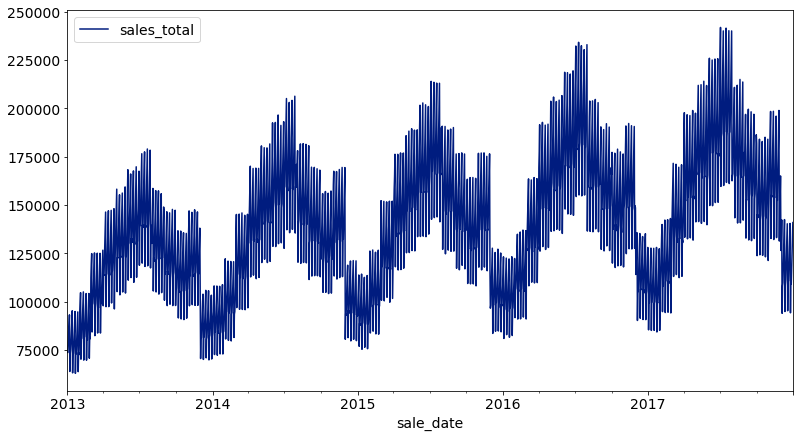

In [79]:
# plot data
df.plot()

In [80]:
df.shape

(1826, 1)

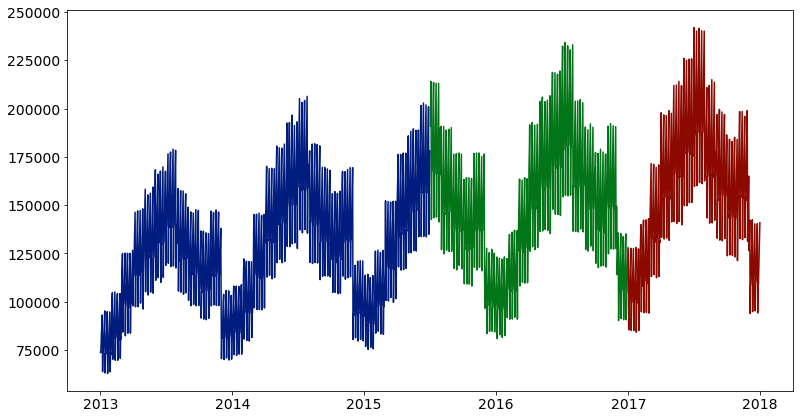

In [81]:
# split data
train_size = .50
validate_size = .30
n = df.shape[0]
validate_start_index = round(train_size * n) # 913
test_start_index = round((validate_size + train_size) * n) # 1461

train = df[:validate_start_index] # everything up to but not including the validate start idx
validate = df[validate_start_index:test_start_index] # validate start idx up to but not including the test start idx
test = df[test_start_index:] # everything from the test start idx to the end

# plot the split dataframes
plt.plot(train.index, train.sales_total)
plt.plot(validate.index, validate.sales_total)
plt.plot(test.index, test.sales_total)

In [82]:
# check end of train
train.tail(1)

,sales_total
sale_date,
2015-07-02 00:00:00+00:00,178036.64


In [83]:
# check beginning of validate
validate.head(1)

,sales_total
sale_date,
2015-07-03 00:00:00+00:00,190981.55


In [84]:
# check end of validate
validate.tail(1)

,sales_total
sale_date,
2016-12-31 00:00:00+00:00,128009.31


In [85]:
# check beginning of test
test.head(1)

,sales_total
sale_date,
2017-01-01 00:00:00+00:00,127262.71


In [180]:
# check shape of all
train.shape, validate.shape, test.shape

((913, 2), (548, 1), (365, 1))

In [181]:
# store target in a variable
y = train.sales_total

<AxesSubplot:ylabel='Frequency'>

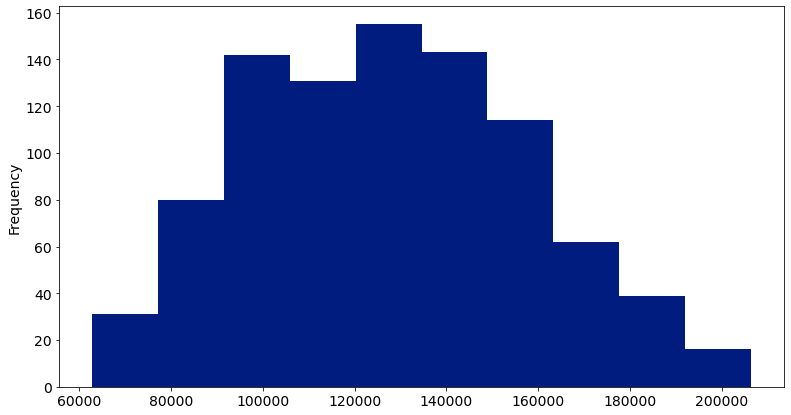

In [182]:
# plot distribution 
y.plot.hist()

[Text(0.5, 1.0, 'Average Total Sales By Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Total Sales ($)')]

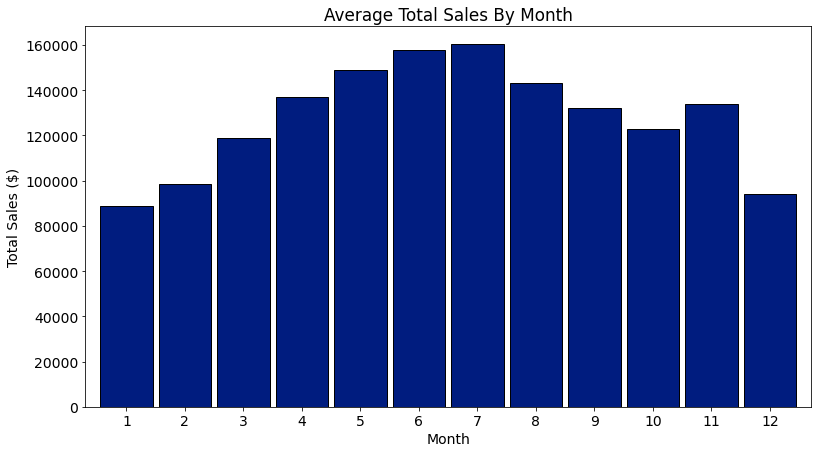

In [183]:
# plot average total sales by month
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Total Sales By Month', xlabel='Month', ylabel='Total Sales ($)')

[Text(0.5, 1.0, 'Average Total Sales by Weekday'),
 Text(0.5, 21.200000000000003, 'Weekday'),
 Text(21.200000000000003, 0.5, 'Total Sales ($)')]

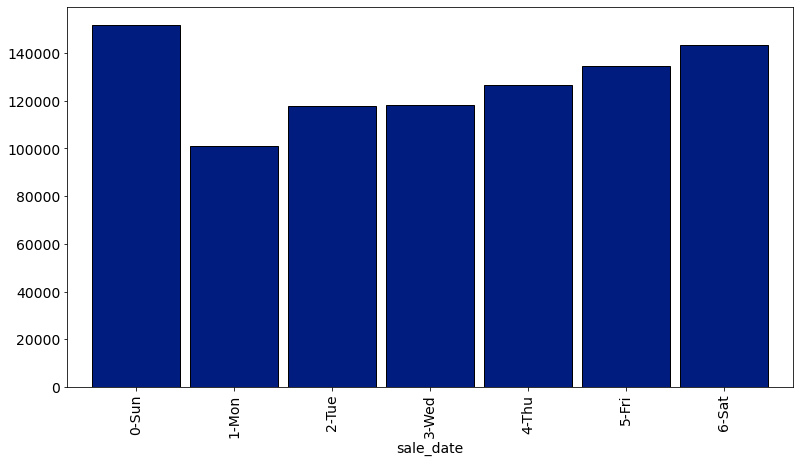

In [184]:
# plot average total sales by weekday
y.groupby(y.index.strftime('%w-%a')).mean().plot.bar(width=.9, ec='black')
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None
ax.set(title='Average Total Sales by Weekday', xlabel='Weekday', ylabel='Total Sales ($)')

<AxesSubplot:xlabel='weekday', ylabel='sales_total'>

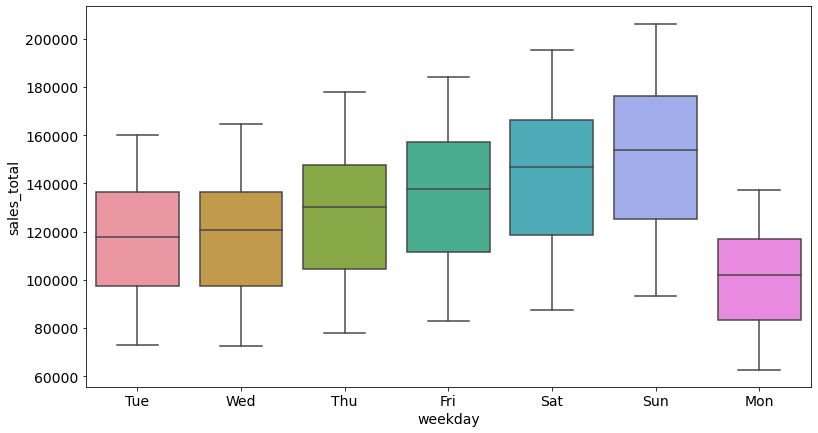

In [185]:
# convert y to a datafram and plot by weekday
y = pd.DataFrame(y)
(
    y.assign(weekday=y.index.strftime('%a'))
    .pipe((sns.boxplot, 'data'), y='sales_total', x='weekday')
)

In [186]:
y.head()

,sales_total
sale_date,
2013-01-01 00:00:00+00:00,73844.01
2013-01-02 00:00:00+00:00,73570.58
2013-01-03 00:00:00+00:00,78169.48
2013-01-04 00:00:00+00:00,84467.73
2013-01-05 00:00:00+00:00,87621.85


<AxesSubplot:title={'center':'weekly average'}, xlabel='sale_date'>

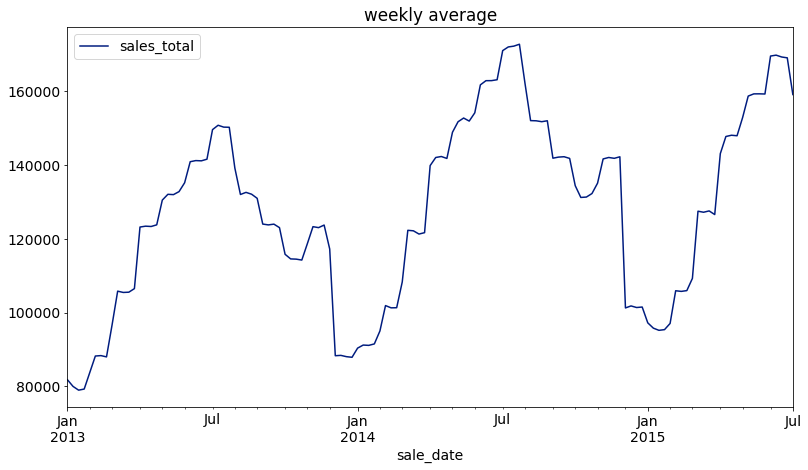

In [187]:
# resample to weekly average and plot
y.resample('W').mean().plot(title='weekly average')

<AxesSubplot:title={'center':'monthly average'}, xlabel='sale_date'>

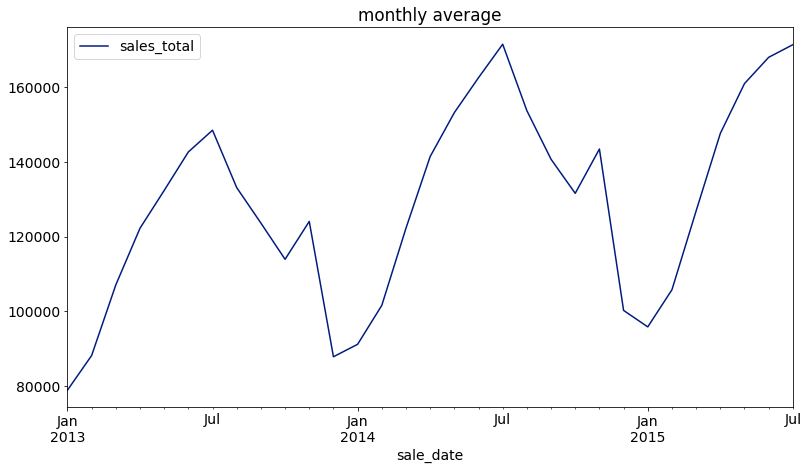

In [188]:
# resample to monthly average and plot
y.resample('M').mean().plot(title='monthly average')

<AxesSubplot:title={'center':'yearly average'}, xlabel='sale_date'>

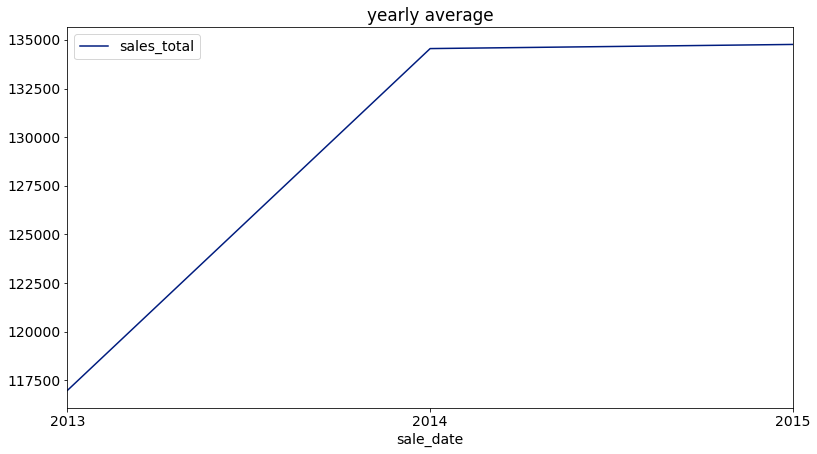

In [189]:
# resample to yearly average and plot
y.resample('Y').mean().plot(title='yearly average')

<AxesSubplot:xlabel='sale_date'>

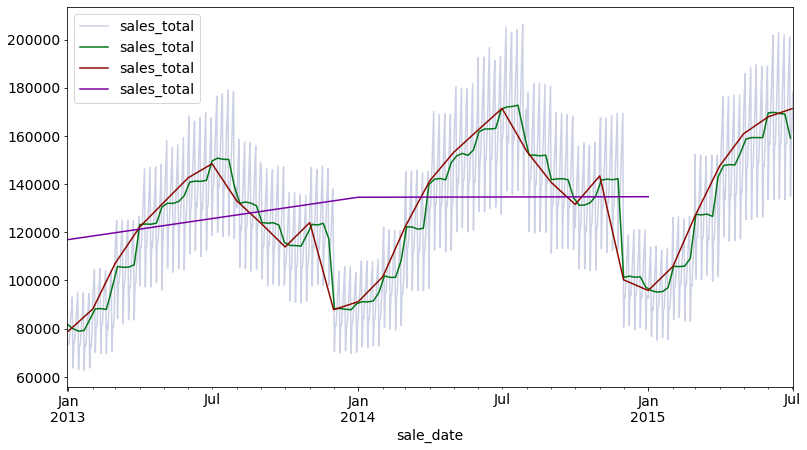

In [190]:
# plot these together
ax = y.plot(alpha=.2, label='Daily')
y.resample('W').mean().plot(ax=ax, label='Weekly')
y.resample('M').mean().plot(ax=ax, label='Monthly')
y.resample('Y').mean().plot(ax=ax, label='Yearly')
# ax.legend()

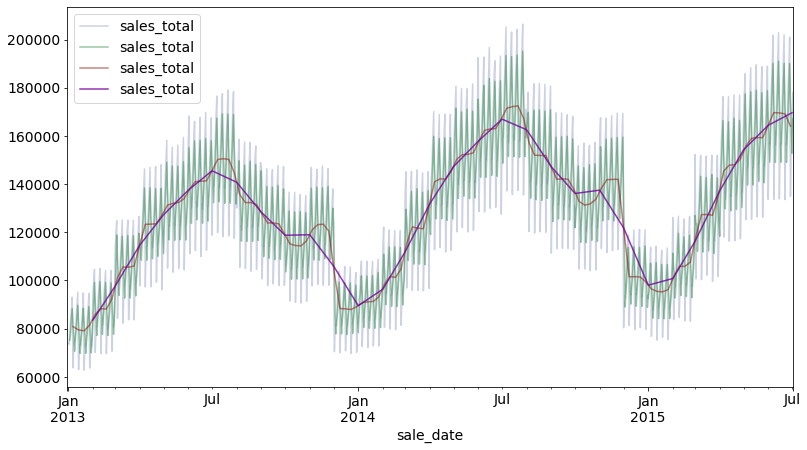

In [191]:
ax = y.plot(alpha=.2, label='Daily')
y.rolling(3).mean().plot(ax=ax, alpha=.4, label='3 days')
y.resample('W').mean().rolling(2).mean().plot(ax=ax, alpha=.5, label='2 weeks')
y.resample('M').mean().rolling(2).mean().plot(ax=ax, alpha=.8, label='2 months')
plt.legend()

# Come back to the two above and figure out how to change legend so it shows labels

<AxesSubplot:title={'center':'Average week-to-week change in total sales'}, xlabel='sale_date'>

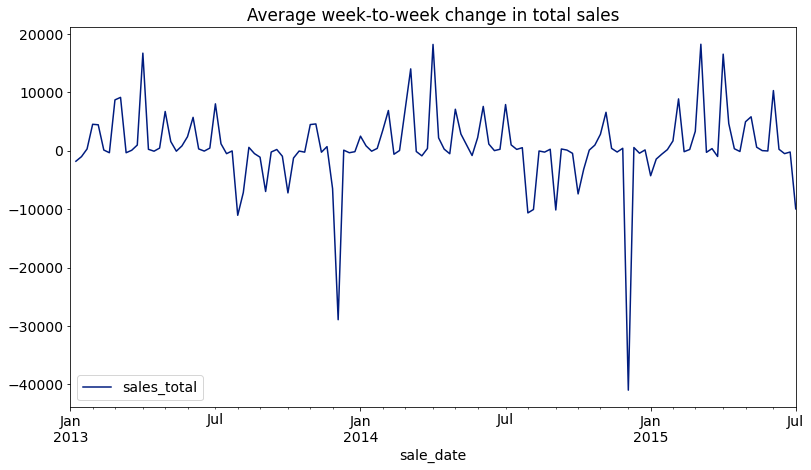

In [192]:
# plot week to week change
y.resample('W').mean().diff().plot(title='Average week-to-week change in total sales')

<AxesSubplot:title={'center':'Average month-to-month change in total sales'}, xlabel='sale_date'>

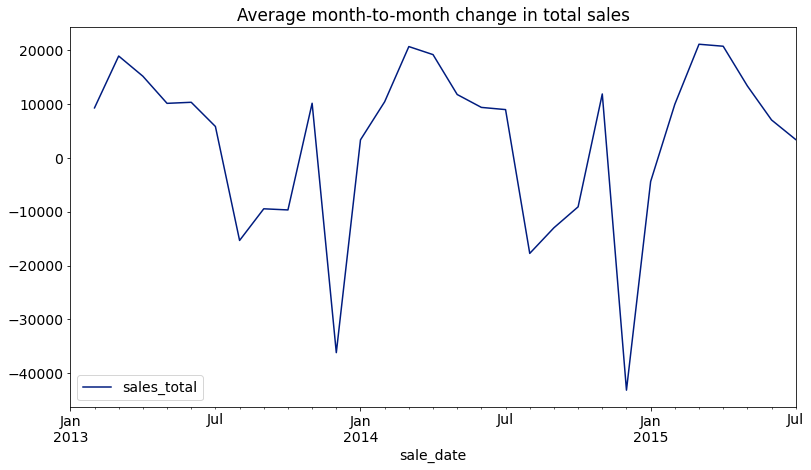

In [193]:
# plot month to month change
y.resample('M').mean().diff().plot(title='Average month-to-month change in total sales')

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

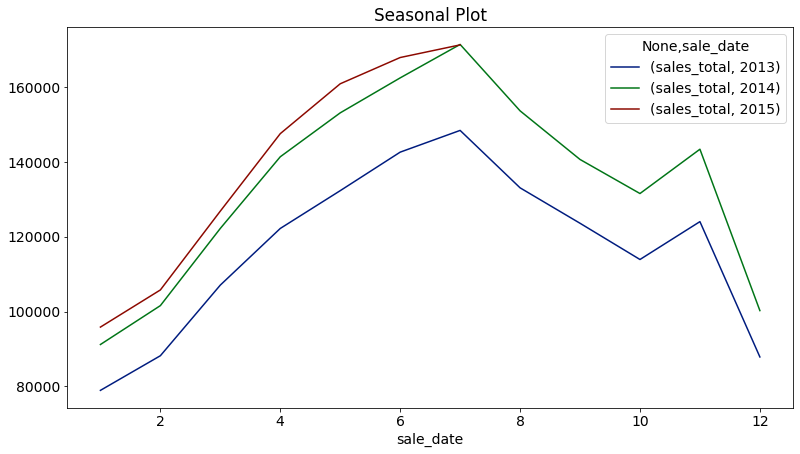

In [194]:
# compare yearly trends
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

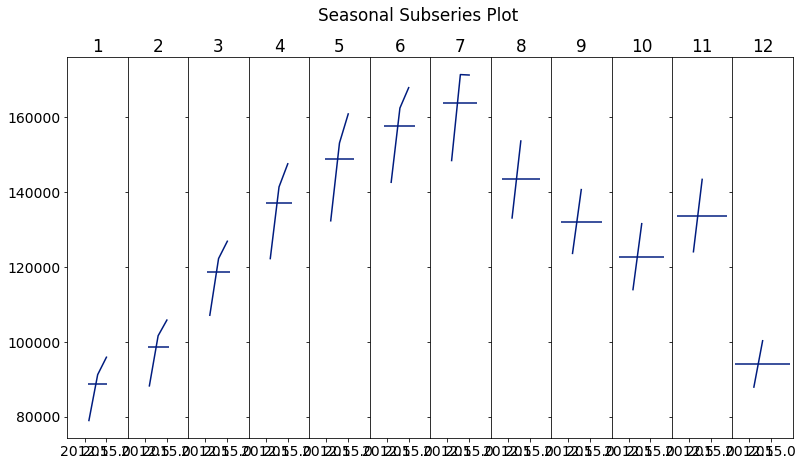

In [195]:
# plot change year over year within each month
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month[1])
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

Text(0.5, 1.0, 'Lag plot with lag=1')

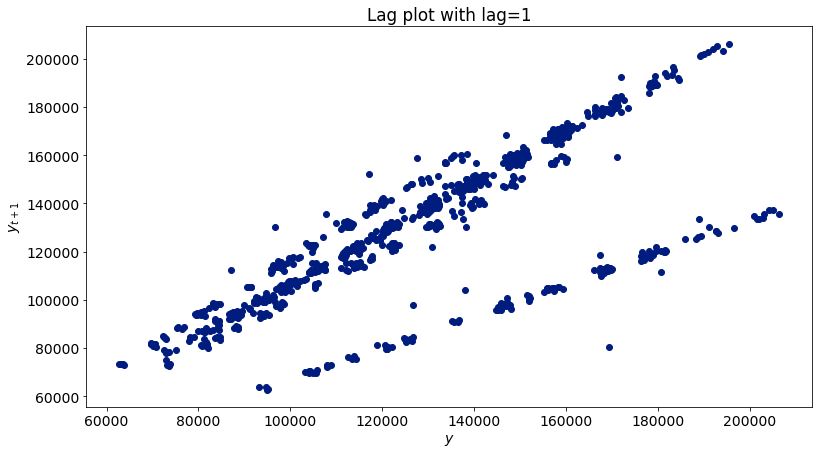

In [196]:
# plot lag
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

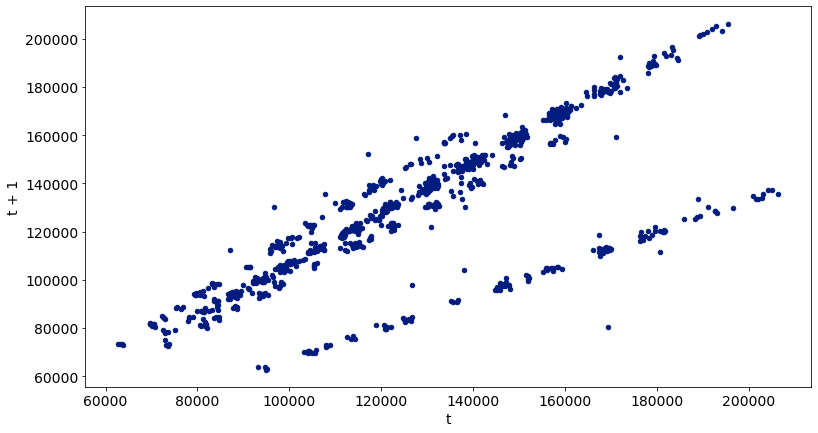

In [197]:
# plot lag in a different way
train['y(t + 1)'] = train.sales_total.shift(-1)
ax = train.plot.scatter(x='sales_total', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

In [198]:
# delete column
del train['y(t + 1)']

,this_week,the_next_week
sale_date,,
2013-01-06 00:00:00+00:00,81794.583333,79990.601429
2013-01-13 00:00:00+00:00,79990.601429,78973.360000
2013-01-20 00:00:00+00:00,78973.360000,79272.691429
2013-01-27 00:00:00+00:00,79272.691429,83792.507143
2013-02-03 00:00:00+00:00,83792.507143,88227.801429
...,...,...
2015-06-07 00:00:00+00:00,169549.668571,169795.024286
2015-06-14 00:00:00+00:00,169795.024286,169292.174286
2015-06-21 00:00:00+00:00,169292.174286,169066.792857


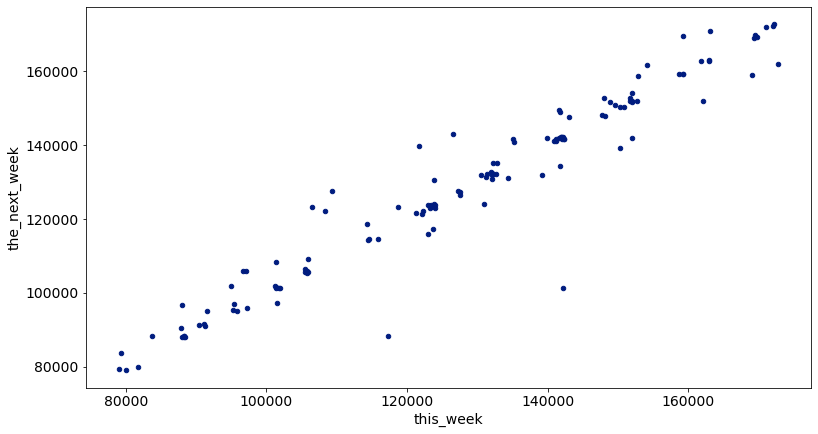

In [199]:
# plot weekly lag
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.sales_total.shift(-1)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

,this_week,12_weeks_out
sale_date,,
2013-01-06 00:00:00+00:00,81794.583333,106501.331429
2013-01-13 00:00:00+00:00,79990.601429,123193.640000
2013-01-20 00:00:00+00:00,78973.360000,123430.685714
2013-01-27 00:00:00+00:00,79272.691429,123345.042857
2013-02-03 00:00:00+00:00,83792.507143,123791.114286
...,...,...
2015-06-07 00:00:00+00:00,169549.668571,NaN
2015-06-14 00:00:00+00:00,169795.024286,NaN
2015-06-21 00:00:00+00:00,169292.174286,NaN


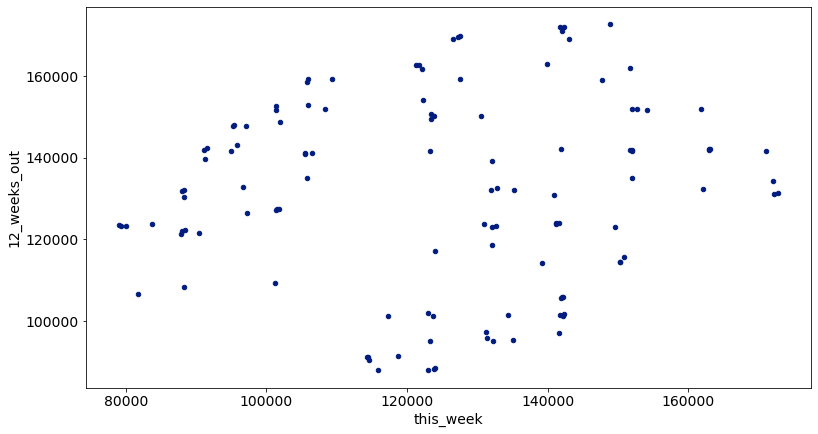

In [200]:
# plot weekly with 12 week lag
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.sales_total.shift(-12)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

,this_week,half_a_year_later
sale_date,,
2013-01-06 00:00:00+00:00,81794.583333,149604.697143
2013-01-13 00:00:00+00:00,79990.601429,150789.424286
2013-01-20 00:00:00+00:00,78973.360000,150282.567143
2013-01-27 00:00:00+00:00,79272.691429,150242.265714
2013-02-03 00:00:00+00:00,83792.507143,139188.128571
...,...,...
2015-06-07 00:00:00+00:00,169549.668571,NaN
2015-06-14 00:00:00+00:00,169795.024286,NaN
2015-06-21 00:00:00+00:00,169292.174286,NaN


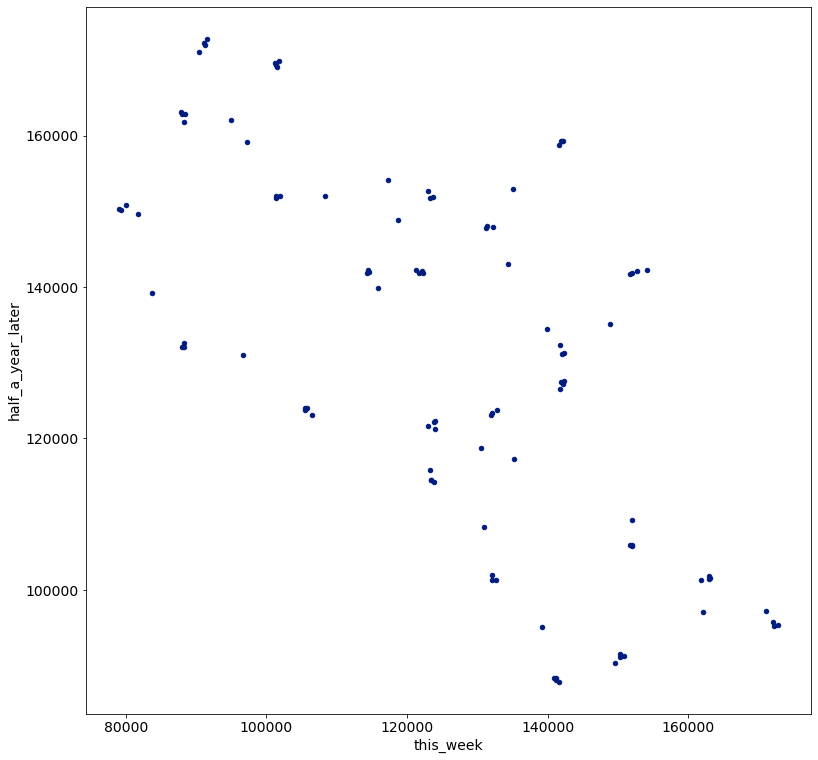

In [201]:
# plot weekly with 26 week lag
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.sales_total.shift(-26)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

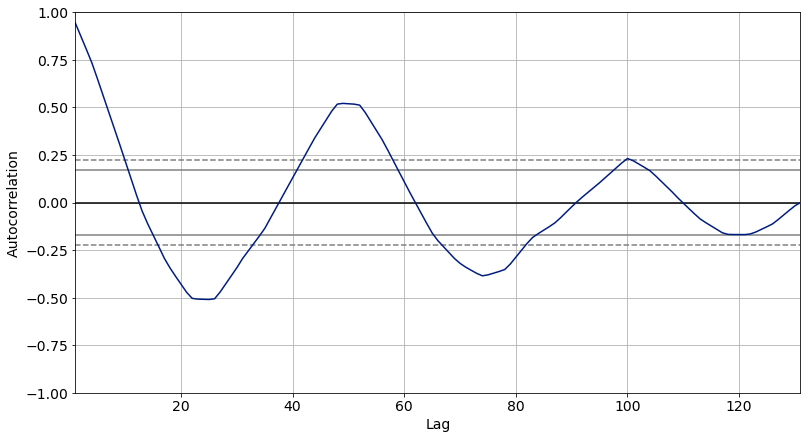

In [202]:
# plot autocorrelation
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

In [203]:
# use seasonal decompose
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,81794.583333,NaN,-38169.061662,NaN
2013-01-13 00:00:00+00:00,79990.601429,NaN,-35389.810670,NaN
2013-01-20 00:00:00+00:00,78973.360000,NaN,-35889.163870,NaN
2013-01-27 00:00:00+00:00,79272.691429,NaN,-35922.082840,NaN
2013-02-03 00:00:00+00:00,83792.507143,NaN,-32845.045574,NaN


<AxesSubplot:xlabel='sale_date'>

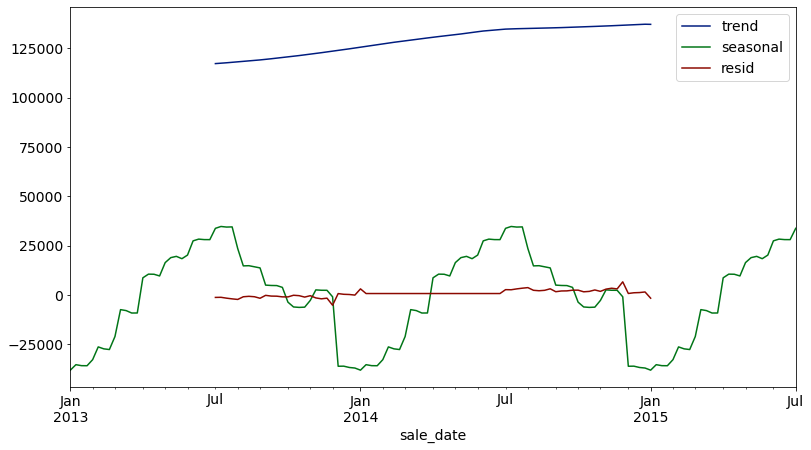

In [204]:
# plot
decomposition.iloc[:, 1:].plot()

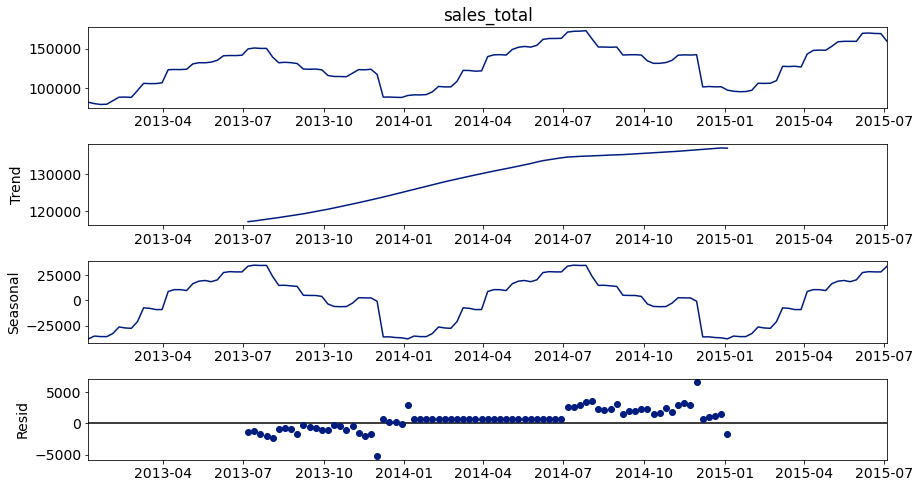

In [205]:
# plot value returned from seasonal_decompose
result.plot()
None

In [206]:
# create a categorical feature
train['sales_bin'] = pd.qcut(train.sales_total, 3, labels=['low', 'avg', 'high'])
train.groupby('sales_bin').mean()

,sales_total
sales_bin,
low,94284.578590
avg,126825.651382
high,161718.833059


Text(0, 0.5, '% of days in the month')

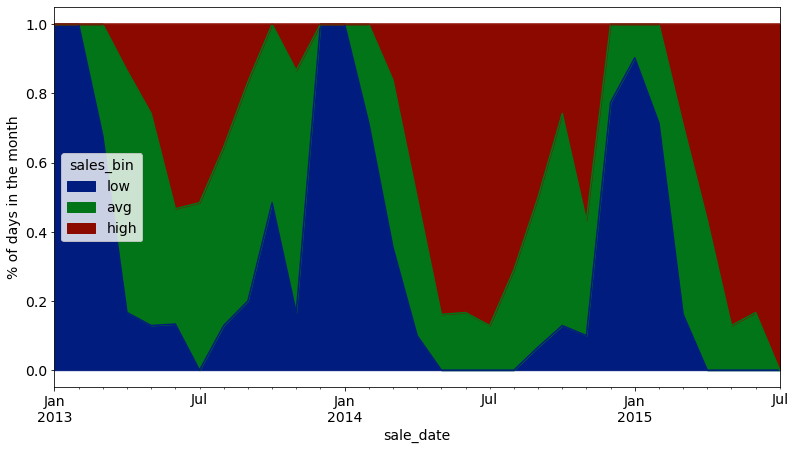

In [207]:
# plot and see how distribution of sales bins are changing over time
(train.groupby('sales_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')

[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

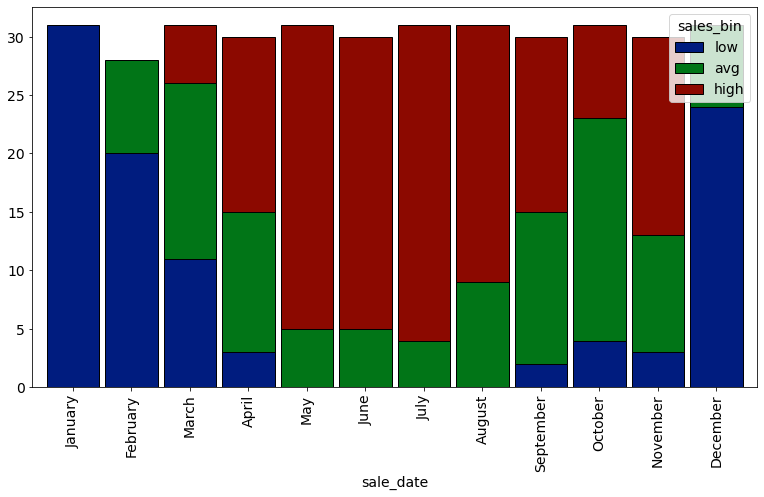

In [208]:
# plot and see how distribution of sales bins change by month
ax = (train['2014']
 .groupby('sales_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)

# OPSD Dataset

In [209]:
df = prepare.prepare_ops_data()
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006
